# Installation of required libraries and basic setup

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:

import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inlineimport pandas as pd
import tensorflow as tf

UsageError: unrecognized arguments: pandas as pd


In [4]:

# from google.colab import auth
# auth.authenticate_user()

In [5]:
# import os
# os.chdir(r'/content/gdrive/MyDrive/DL/landslide4Sense')

# Testing the dataset 

In [6]:
# Testing the dataset 
path_single = r"img/image_2000.h5"
path_single_mask = r'mask/mask_2000.h5'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


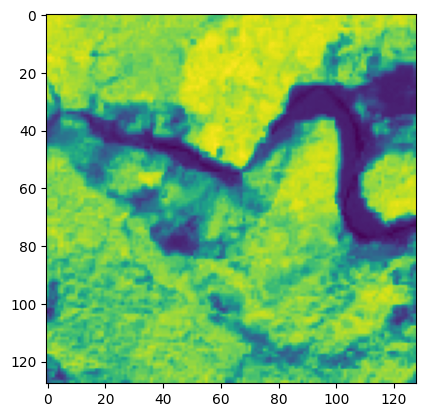

In [7]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


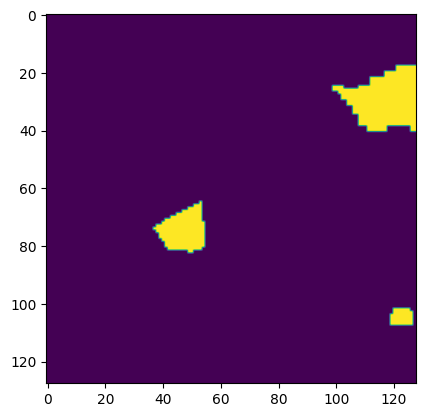

In [8]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

# Using all dataset

In [9]:
path_single = r"img/image_10.h5"
path_single_mask = r'mask/mask_1.h5'
TRAIN_PATH = r"img/*.h5"
TRAIN_MASK = r'mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

## Train with RGB, NDVI, DEM, and Slope 


In [10]:
#testing for google colab GPU
import tensorflow as tf
tf.test.gpu_device_name()

''

In [11]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 img\image_1.h5 mask\mask_1.h5
1 img\image_10.h5 mask\mask_10.h5
2 img\image_100.h5 mask\mask_100.h5
3 img\image_1000.h5 mask\mask_1000.h5
4 img\image_1001.h5 mask\mask_1001.h5
5 img\image_1002.h5 mask\mask_1002.h5
6 img\image_1003.h5 mask\mask_1003.h5
7 img\image_1004.h5 mask\mask_1004.h5
8 img\image_1005.h5 mask\mask_1005.h5
9 img\image_1006.h5 mask\mask_1006.h5
10 img\image_1007.h5 mask\mask_1007.h5
11 img\image_1008.h5 mask\mask_1008.h5
12 img\image_1009.h5 mask\mask_1009.h5
13 img\image_101.h5 mask\mask_101.h5
14 img\image_1010.h5 mask\mask_1010.h5
15 img\image_1011.h5 mask\mask_1011.h5
16 img\image_1012.h5 mask\mask_1012.h5
17 img\image_1013.h5 mask\mask_1013.h5
18 img\image_1014.h5 mask\mask_1014.h5
19 img\image_1015.h5 mask\mask_1015.h5
20 img\image_1016.h5 mask\mask_1016.h5
21 img\image_1017.h5 mask\mask_1017.h5
22 img\image_1018.h5 mask\mask_1018.h5
23 img\image_1019.h5 mask\mask_1019.h5
24 img\image_102.h5 mask\mask_102.h5
25 img\image_1020.h5 mask\mask_1020.h5
26 img\image

C:\Users\Lokesh\AppData\Local\Temp\ipykernel_2860\3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


1594 img\image_2433.h5 mask\mask_2433.h5
1595 img\image_2434.h5 mask\mask_2434.h5
1596 img\image_2435.h5 mask\mask_2435.h5
1597 img\image_2436.h5 mask\mask_2436.h5
1598 img\image_2437.h5 mask\mask_2437.h5
1599 img\image_2438.h5 mask\mask_2438.h5
1600 img\image_2439.h5 mask\mask_2439.h5
1601 img\image_244.h5 mask\mask_244.h5
1602 img\image_2440.h5 mask\mask_2440.h5
1603 img\image_2441.h5 mask\mask_2441.h5
1604 img\image_2442.h5 mask\mask_2442.h5
1605 img\image_2443.h5 mask\mask_2443.h5
1606 img\image_2444.h5 mask\mask_2444.h5
1607 img\image_2445.h5 mask\mask_2445.h5
1608 img\image_2446.h5 mask\mask_2446.h5
1609 img\image_2447.h5 mask\mask_2447.h5
1610 img\image_2448.h5 mask\mask_2448.h5
1611 img\image_2449.h5 mask\mask_2449.h5
1612 img\image_245.h5 mask\mask_245.h5
1613 img\image_2450.h5 mask\mask_2450.h5
1614 img\image_2451.h5 mask\mask_2451.h5
1615 img\image_2452.h5 mask\mask_2452.h5
1616 img\image_2453.h5 mask\mask_2453.h5
1617 img\image_2454.h5 mask\mask_2454.h5
1618 img\image_2455.

C:\Users\Lokesh\AppData\Local\Temp\ipykernel_2860\3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1688 img\image_2518.h5 mask\mask_2518.h5
1689 img\image_2519.h5 mask\mask_2519.h5
1690 img\image_252.h5 mask\mask_252.h5
1691 img\image_2520.h5 mask\mask_2520.h5
1692 img\image_2521.h5 mask\mask_2521.h5
1693 img\image_2522.h5 mask\mask_2522.h5
1694 img\image_2523.h5 mask\mask_2523.h5
1695 img\image_2524.h5 mask\mask_2524.h5
1696 img\image_2525.h5 mask\mask_2525.h5
1697 img\image_2526.h5 mask\mask_2526.h5
1698 img\image_2527.h5 mask\mask_2527.h5
1699 img\image_2528.h5 mask\mask_2528.h5
1700 img\image_2529.h5 mask\mask_2529.h5
1701 img\image_253.h5 mask\mask_253.h5
1702 img\image_2530.h5 mask\mask_2530.h5
1703 img\image_2531.h5 mask\mask_2531.h5
1704 img\image_2532.h5 mask\mask_2532.h5
1705 img\image_2533.h5 mask\mask_2533.h5
1706 img\image_2534.h5 mask\mask_2534.h5
1707 img\image_2535.h5 mask\mask_2535.h5
1708 img\image_2536.h5 mask\mask_2536.h5
1709 img\image_2537.h5 mask\mask_2537.h5
1710 img\image_2538.h5 mask\mask_2538.h5
1711 img\image_2539.h5 mask\mask_2539.h5
1712 img\image_254.h

## Testing min, max values in train data

In [12]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


## Custom loss function (Dice Loss)

In [13]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

## Visualization of the training data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


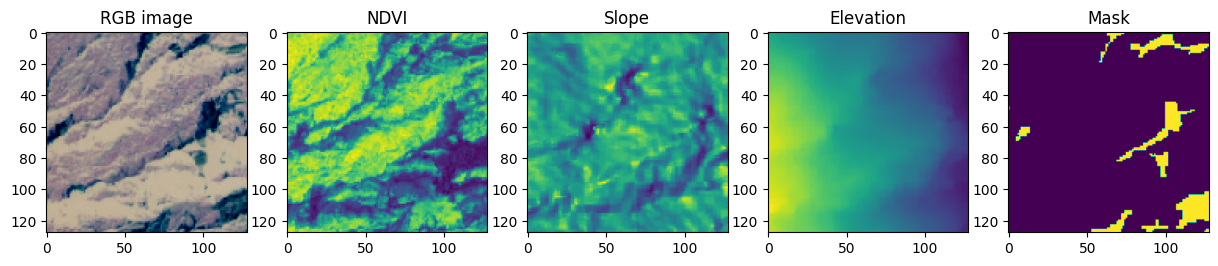

In [14]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

## Validation split

In [15]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


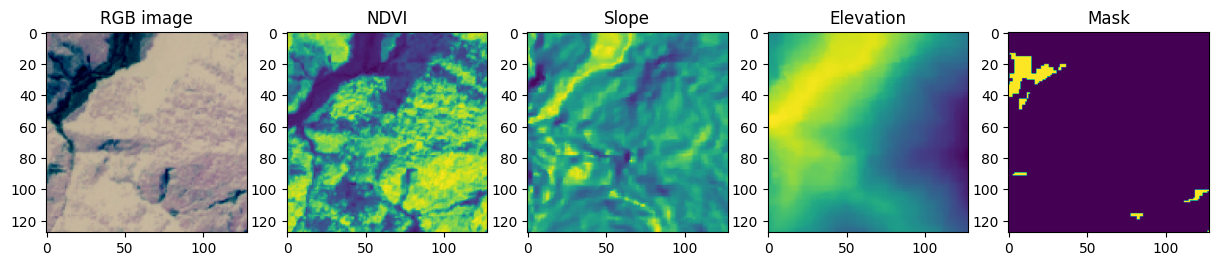

In [16]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [17]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [18]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


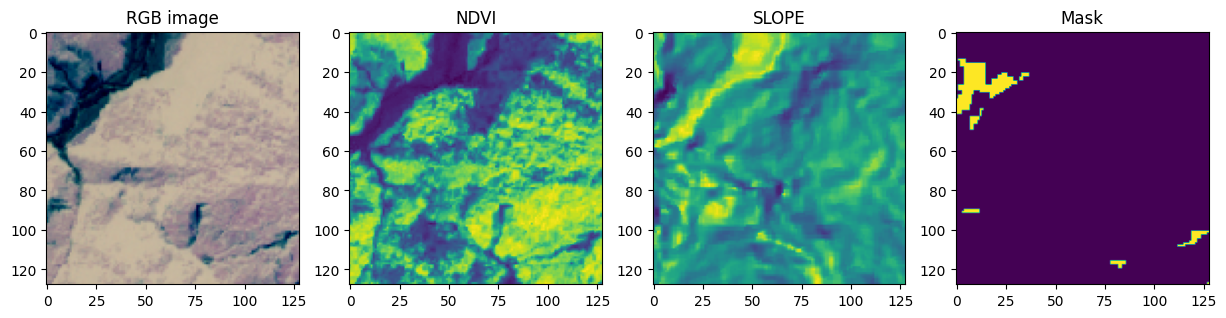

In [19]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

# Unet Model

In [20]:
from tensorflow.keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [21]:
# from utils import recall_m, precision_m, f1_m
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [22]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [31]:
model = unet_model(128, 128, 6)
 # model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
   ]
history = model.fit(x_train, y_train, batch_size=16,  
         epochs=100, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
         callbacks=callbacks)

model.save("model_save.h5")

Epoch 1/100

Epoch 1: val_f1_m improved from -inf to 0.43563, saving model to best_model.h5
190/190 - 164s - loss: 0.0937 - accuracy: 0.9725 - f1_m: 0.1372 - precision_m: 0.4815 - recall_m: 0.0980 - val_loss: 0.0520 - val_accuracy: 0.9809 - val_f1_m: 0.4356 - val_precision_m: 0.6684 - val_recall_m: 0.3388 - 164s/epoch - 862ms/step
Epoch 2/100


C:\Users\Lokesh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


KeyboardInterrupt: 

In [ ]:
model = unet_model(128,128,6)
model.load_weights(r"C:\BE PROJECT 2\Landslide\model\best_model.h5")

# loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
history = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

NameError: name 'loss' is not defined

# detection

In [29]:
# fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
# ax11.plot(history.history['loss'])
# ax11.plot(history.history['val_loss'])
# ax11.title.set_text('Unet model loss')
# ax11.set_ylabel('loss')
# ax11.set_xlabel('epoch')
# ax11.legend(['train', 'validation'], loc='upper left')

# ax12.plot(history.history['precision_m'])
# ax12.plot(history.history['val_precision_m'])
# ax12.set_title('Unet model precision')
# ax12.set_ylabel('precision')
# ax12.set_xlabel('epoch')
# ax12.legend(['train', 'validation'], loc='upper left')

# ax13.plot(history.history['recall_m'])
# ax13.plot(history.history['val_recall_m'])
# ax13.set_title('Unet model recall')
# ax13.set_ylabel('recall')
# ax13.set_xlabel('epoch')
# ax13.legend(['train', 'validation'], loc='upper left')

# ax14.plot(history.history['f1_m'])
# ax14.plot(history.history['val_f1_m'])
# ax14.set_title('Unet model f1')
# ax14.set_ylabel('f1')
# ax14.set_xlabel('epoch')
# ax14.legend(['train', 'validation'], loc='upper left')

In [ ]:
threshold = 0.5
pred_img = model.predict(x_train)
pred_img = (pred_img > threshold).astype(np.uint8)

95/95 [==============================] - 25s 260ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

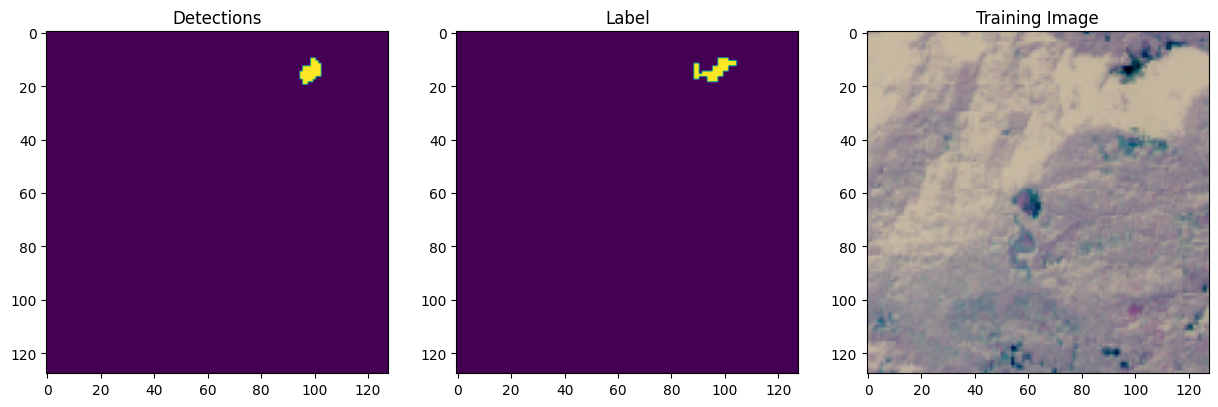

In [ ]:
# train
img = 125
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Detections")
ax2.imshow(y_train[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_train[img, :, :, 0:3])
ax3.set_title('Training Image')

In [ ]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 [==============================] - 6s 260ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

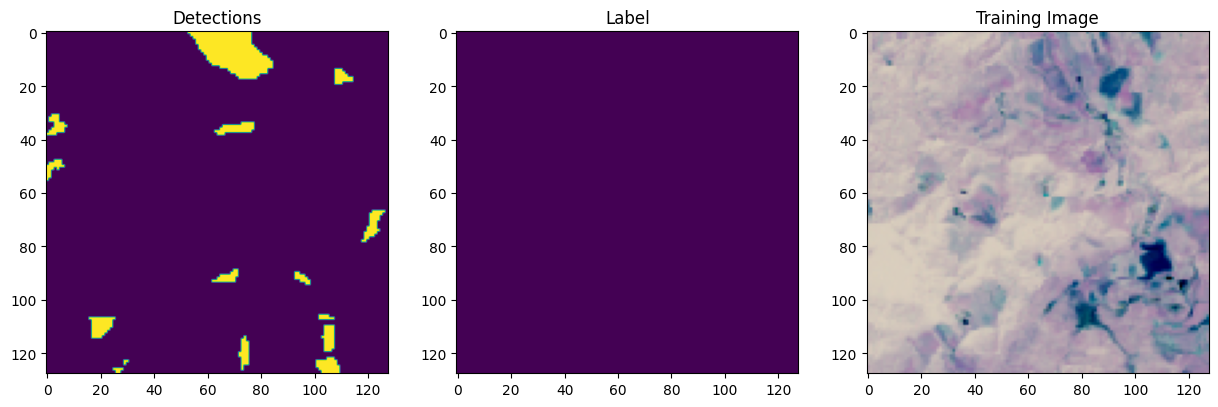

In [ ]:
# validation
img = 12
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Detections")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

# Validation data 

In [ ]:
validation_url = r'C:\BE PROJECT 2\Landslide\ValidData (1)\img/*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_1.h5
1 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_10.h5
2 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_100.h5
3 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_101.h5
4 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_102.h5
5 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_103.h5
6 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_104.h5
7 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_105.h5
8 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_106.h5
9 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_107.h5
10 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_108.h5
11 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_109.h5
12 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_11.h5
13 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_110.h5
14 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_111.h5
15 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_112.h5
16 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_1

C:\Users\Lokesh\AppData\Local\Temp\ipykernel_19424\1633775198.py:24: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


181 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_41.h5
182 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_42.h5
183 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_43.h5
184 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_44.h5
185 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_45.h5
186 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_46.h5
187 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_47.h5
188 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_48.h5
189 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_49.h5
190 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_5.h5
191 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_50.h5
192 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_51.h5
193 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_52.h5
194 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_53.h5
195 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_54.h5
196 C:\BE PROJECT 2\Landslide\ValidData (1)\img\image_55.h5
197 C:\BE PROJECT 2\Landslide\ValidData (

## output for validation data

In [ ]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 [==============================] - 2s 289ms/step


(245, 128, 128, 1)

## Visualization of validation image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

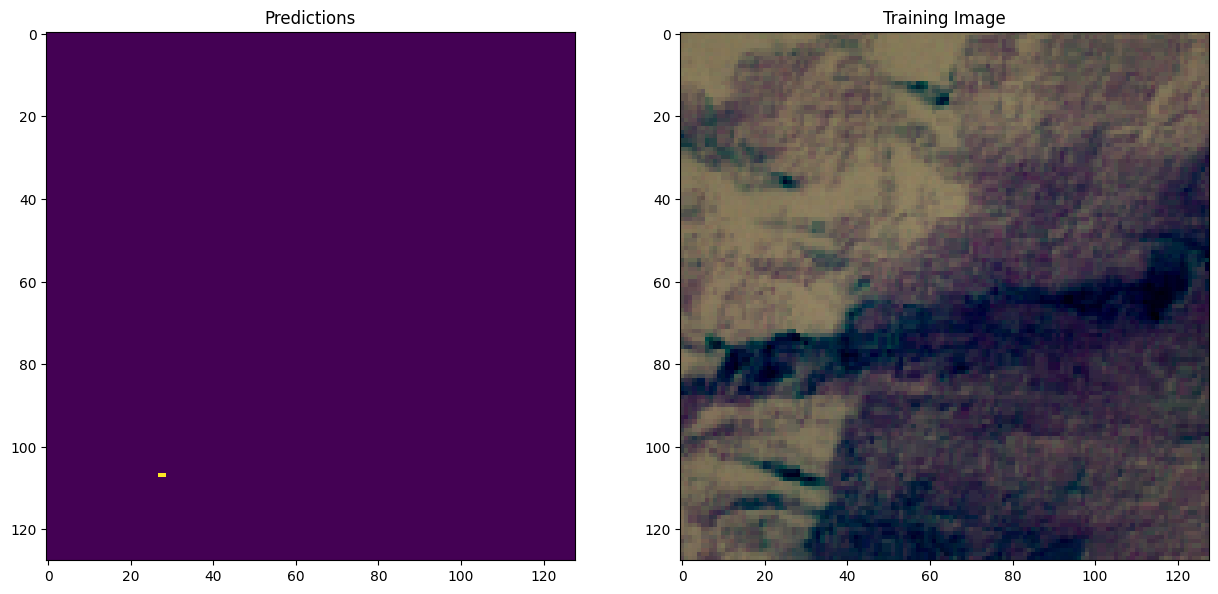

In [ ]:
img = 125
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

In [27]:
write_directory = r'/ValidData (1)/mask'
for i, name in enumerate(mask_name):
  h5f = h5py.File(write_directory + "/" + name, 'w')
  # change the dimention of prediction to (n, 128, 128)
  pred_mask = pred_img[i, :, :, 0]

  # write to the directory
  h5f.create_dataset('mask', data = pred_mask)
  h5f.close()

NameError: name 'mask_name' is not defined